In [341]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn import linear_model

import seaborn as sns

from scipy.stats import norm

from sklearn.model_selection import KFold

from sklearn.linear_model import BayesianRidge

In [342]:
url = "https://raw.githubusercontent.com/CS-521-A3/final-project-jaime-wang-and-Hilda-Guo/main/House%20Prediction%20Data.csv"
df = pd.read_csv('house_price')

In [343]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [344]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [345]:
df[['HouseStyle','SalePrice']]

,HouseStyle,SalePrice
0,2Story,208500.0
1,1Story,181500.0
2,2Story,223500.0
3,2Story,140000.0
4,2Story,250000.0
...,...,...
2914,2Story,NaN
2915,2Story,NaN
2916,1Story,NaN
2917,SFoyer,NaN


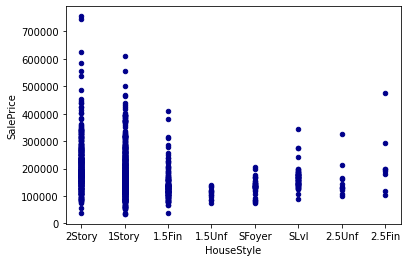

In [346]:
df.plot.scatter(x='HouseStyle', y='SalePrice', c='darkblue')
plt.show()

In [347]:
df[['LotFrontage', 'SalePrice']]

,LotFrontage,SalePrice
0,65.0,208500.0
1,80.0,181500.0
2,68.0,223500.0
3,60.0,140000.0
4,84.0,250000.0
...,...,...
2914,21.0,NaN
2915,21.0,NaN
2916,160.0,NaN
2917,62.0,NaN


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

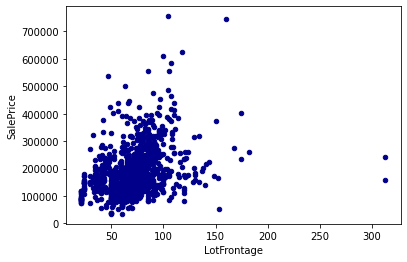

In [348]:
df.plot.scatter(x='LotFrontage', y='SalePrice', c='darkblue')

In [349]:
df[['LotArea', 'SalePrice']]

,LotArea,SalePrice
0,8450,208500.0
1,9600,181500.0
2,11250,223500.0
3,9550,140000.0
4,14260,250000.0
...,...,...
2914,1936,NaN
2915,1894,NaN
2916,20000,NaN
2917,10441,NaN


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

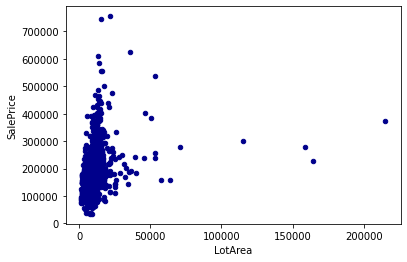

In [350]:
df.plot.scatter(x='LotArea', y='SalePrice', c='darkblue')

In [351]:
house_style = df['HouseStyle'].unique()
house_style

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [352]:
df_livingArea = df[['GrLivArea','SalePrice']]

In [353]:
df_livingArea = df_livingArea.dropna()

In [354]:
model = linear_model.LinearRegression()

In [355]:
X = df_livingArea['GrLivArea'].to_numpy().reshape(1460, 1)
y = df_livingArea['SalePrice'].to_numpy().reshape(1460, 1)

In [356]:
model.fit(X,y)

LinearRegression()

In [357]:
model.predict([[1000]])

array([[125699.38482231]])

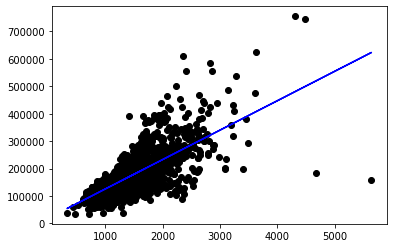

In [358]:
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="blue")

In [359]:
df_SF = df[['TotalBsmtSF','SalePrice']]
df_SF

,TotalBsmtSF,SalePrice
0,856.0,208500.0
1,1262.0,181500.0
2,920.0,223500.0
3,756.0,140000.0
4,1145.0,250000.0
...,...,...
2914,546.0,NaN
2915,546.0,NaN
2916,1224.0,NaN
2917,912.0,NaN


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

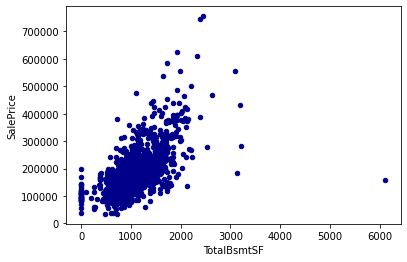

In [360]:
df_SF.plot.scatter(x= 'TotalBsmtSF',y='SalePrice',c = 'darkblue')

In [361]:
df_SF = df_SF.dropna()

In [362]:
model = linear_model.LinearRegression()

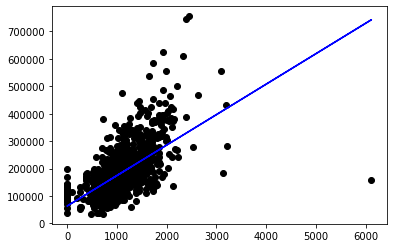

In [363]:
X = df_SF['TotalBsmtSF'].to_numpy().reshape(1460,1)
y = df_SF['SalePrice'].to_numpy().reshape(1460,1)
model.fit(X,y)
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="blue")

In [364]:
df_Quality = df[['OverallQual','SalePrice']]
df_Quality = df_Quality.dropna()
df_Quality

,OverallQual,SalePrice
0,7,208500.0
1,6,181500.0
2,7,223500.0
3,7,140000.0
4,8,250000.0
...,...,...
1455,6,175000.0
1456,6,210000.0
1457,7,266500.0
1458,5,142125.0


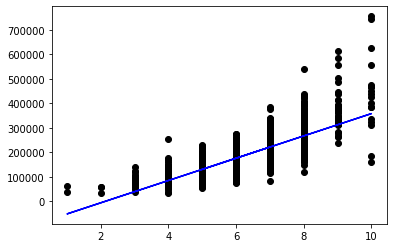

In [365]:
model = linear_model.LinearRegression()
X = df_Quality['OverallQual'].to_numpy().reshape(1460,1)
y = df_Quality['SalePrice'].to_numpy().reshape(1460,1)
model.fit(X,y)
plt.scatter(X,y, color='black')
plt.plot(X, model.predict(X), color="blue")

c:\users\67553\pycharmprojects\termproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

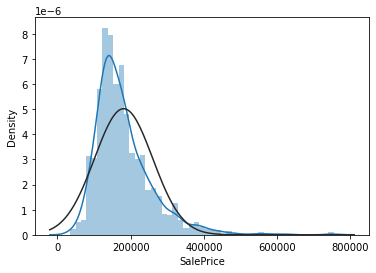

In [366]:
df['SalePrice'].describe()
sns.distplot(df['SalePrice'],fit=norm)

In [367]:
kf = KFold(n_splits=5,shuffle=True)
result = next(kf.split(df), None)
train_data = df.iloc[result[0]]
test_data = df.iloc[result[1]]
train_data.reset_index(drop=True)
test_data.reset_index(drop=True)
train_data.to_csv('train_data',index = False)
test_data.to_csv('test_data', index = False)




In [368]:
train_data = train_data.dropna(subset=['SalePrice'])
train_data = pd.get_dummies(train_data,dummy_na=True)
train_data = train_data.dropna()
train_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=326)

In [369]:
model = BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06)
X = train_data.drop(columns=['SalePrice'])
y = train_data.SalePrice.values

In [370]:
model.fit(X,y)
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)


BayesianRidge(normalize=False)

In [371]:
train_predict = model.predict(X)
train_predict

array([224440.54982487, 186341.19210468, 228630.54292059, 158146.91681792,
       276575.7162137 , 159408.00009371,  72898.4578257 , 249438.40591361,
       123889.57297851, 116402.34186217, 143663.81061631, 297397.13573976,
        92803.22776287, 255980.7001109 , 149421.02828117, 260269.09055282,
       220327.2585088 ,  46964.24044236,  93068.31485625, 189951.15314511,
       237798.52876209, 198997.86808501, 159604.6012989 , 145180.82282624,
       124455.13948162, 249819.06328518, 310421.0150845 , 248966.38825961,
       119908.09781987,  92007.7674802 , 311269.53664159, 129457.0988853 ,
       190635.3783447 , 218533.62366292, 206827.43780364, 351935.5627892 ,
       125948.44819327, 202398.72463464, 101929.67122709, 130155.78390618,
       304062.98944868, 239373.91658971,  72163.08699073, 221699.10240383,
       312922.71889001, 154614.42574223, 125047.48324705,  98075.2047642 ,
       139734.41096466, 111361.51852119, 240277.5605865 , 257940.48706014,
       128545.99094684,  

In [372]:
import math

sub=pd.DataFrame()
sub['Id']=train_data['Id']
sub['SalePrice']=train_predict
sub

,Id,SalePrice
0,1,224440.549825
1,2,186341.192105
2,3,228630.542921
3,4,158146.916818
6,7,276575.716214
...,...,...
1455,1456,190620.401351
1456,1457,252273.681140
1457,1458,206537.930581
1458,1459,140641.725507
